<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Facial_Landmarks_and_Face_Detection_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Landmark Detection**

Facial landmark detection is the process of detecting landmarks or regions of interest (key-points) on the face like Eyebrows, Eyes, Nose, Mouth and Jaw silhouette. Some applications of facial landmark detection are face swap, head pose detection, detecting facial gestures, gaze direction etc.

## Packages Installation

In [2]:
!pip install opencv-python
!pip install urllib3
!pip install matplotlib

## Import Packages

In [3]:
import cv2
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams

## Retrieve Image

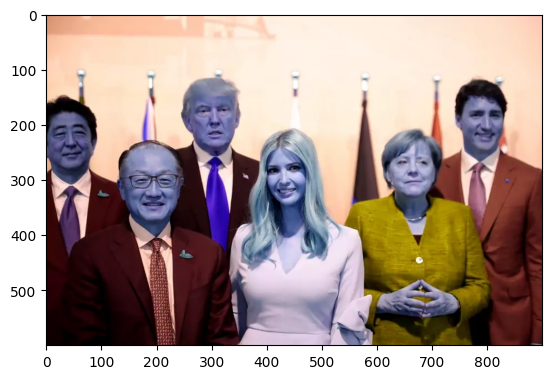

In [6]:
# save picture's url in pics_url variable
pics_url = "https://cdn.cfr.org/sites/default/files/styles/slide_3_2/public/image/2017/10/RTX3ALMK.jpg.webp"

# save picture's name as pic
pic = "/image.webp"

# download picture from url and save locally as image.jpg
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

## Image Processing

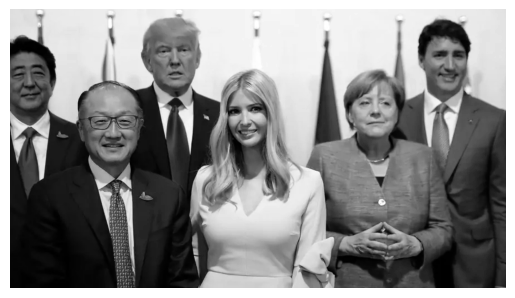

In [23]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

# set dimension for cropping image
x, y, width, depth = 10, 100, 1000, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

## Face Detection

File exists
Faces:
 [[246  34  99  99]
 [740  45  95  95]
 [611 133  91  91]
 [377 148  90  90]
 [125 152 123 123]
 [733 151  82  82]
 [145 284  92  92]]


Text(0.5, 1.0, 'Face Detection')

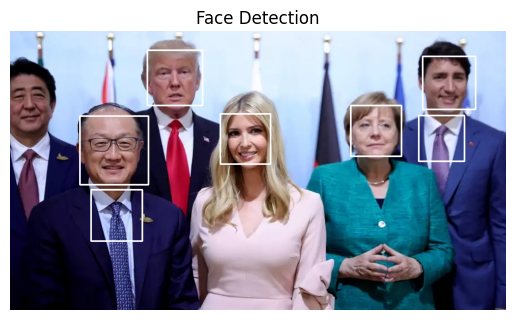

In [24]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

## Facial Landmarks Detection

File exists


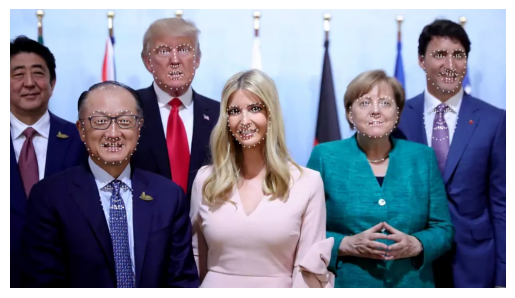

In [36]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (int(x), int(y)), 1, (255, 255, 255), 1)

plt.axis("off")
plt.imshow(image_cropped)